In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
india=pd.read_csv('AQI.csv',encoding='unicode_escape')
pd.set_option('display.max_columns',None)

In [3]:
india.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [4]:
india.shape

(435742, 13)

In [5]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
india.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
india.nunique()

stn_code                        803
sampling_date                  5071
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [8]:
nullvalues = india.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [9]:
null_values_percentage = (india.isnull().sum()/india.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues,null_values_percentage], axis=1, keys=['Total','Percent'])
print("\n\nTotal number of missing values and their percentages:\n",missing_data_with_percentage)



Total number of missing values and their percentages:
                               Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000


In [10]:
india.drop(['pm2_5'],axis=1,inplace=True)
india.drop(['agency'],axis=1,inplace=True)
india.drop(['stn_code'],axis=1,inplace=True)
india.drop(['date'],axis=1,inplace=True)
india.drop(['sampling_date'],axis=1,inplace=True) 
india.drop(['location_monitoring_station'],axis=1,inplace=True)

In [11]:
india.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
dtype: int64

In [12]:
india

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
india['type']=india['type'].fillna(india['type'].mode()[0])

In [14]:
india.dropna(subset=['location'],how='any',inplace=True)

In [15]:
india['so2']=india['so2'].fillna(india['so2'].mean())
india['no2']=india['no2'].fillna(india['no2'].mean())
india['rspm']=india['rspm'].fillna(india['rspm'].mean())
india['spm']=india['spm'].fillna(india['spm'].mean())

In [16]:
india.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
dtype: int64

In [17]:
india

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,220.78348
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,220.78348
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,220.78348
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,220.78348


In [18]:
india['state'].value_counts()

state
Maharashtra             60384
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19279
Karnataka               17119
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikk

[]

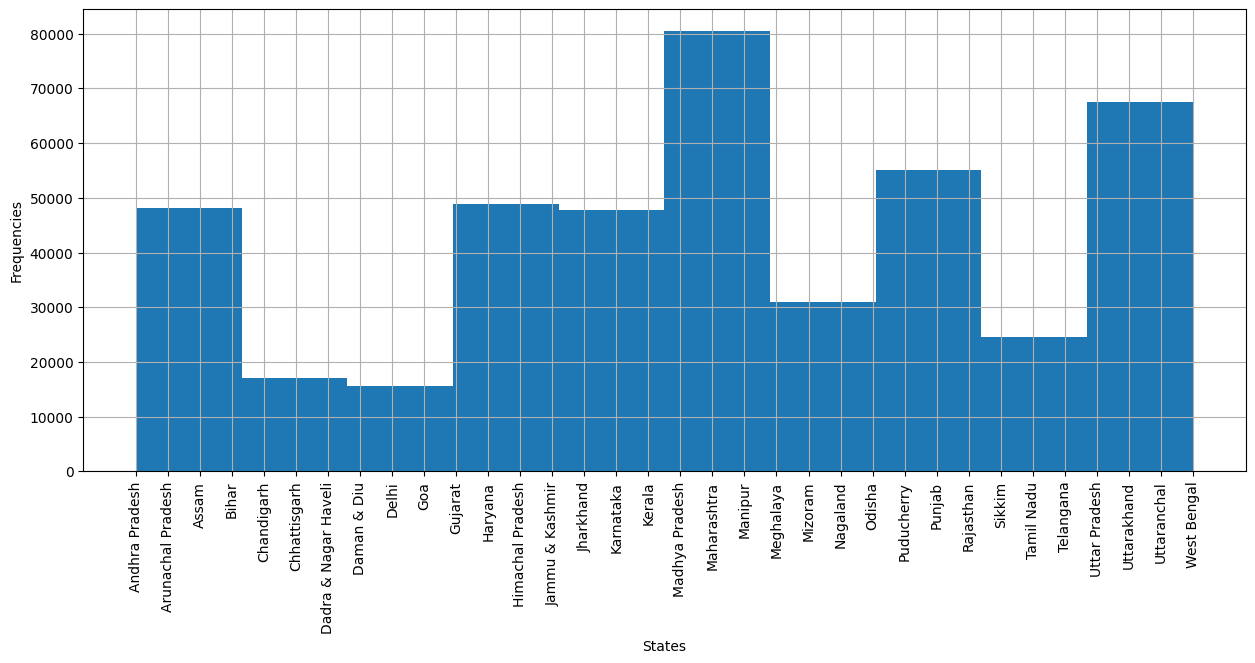

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
india.state.hist()
plt.xlabel('States')
plt.ylabel('Frequencies')
plt.plot()

In [20]:
india['type'].value_counts()

type
Residential, Rural and other Areas    184404
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

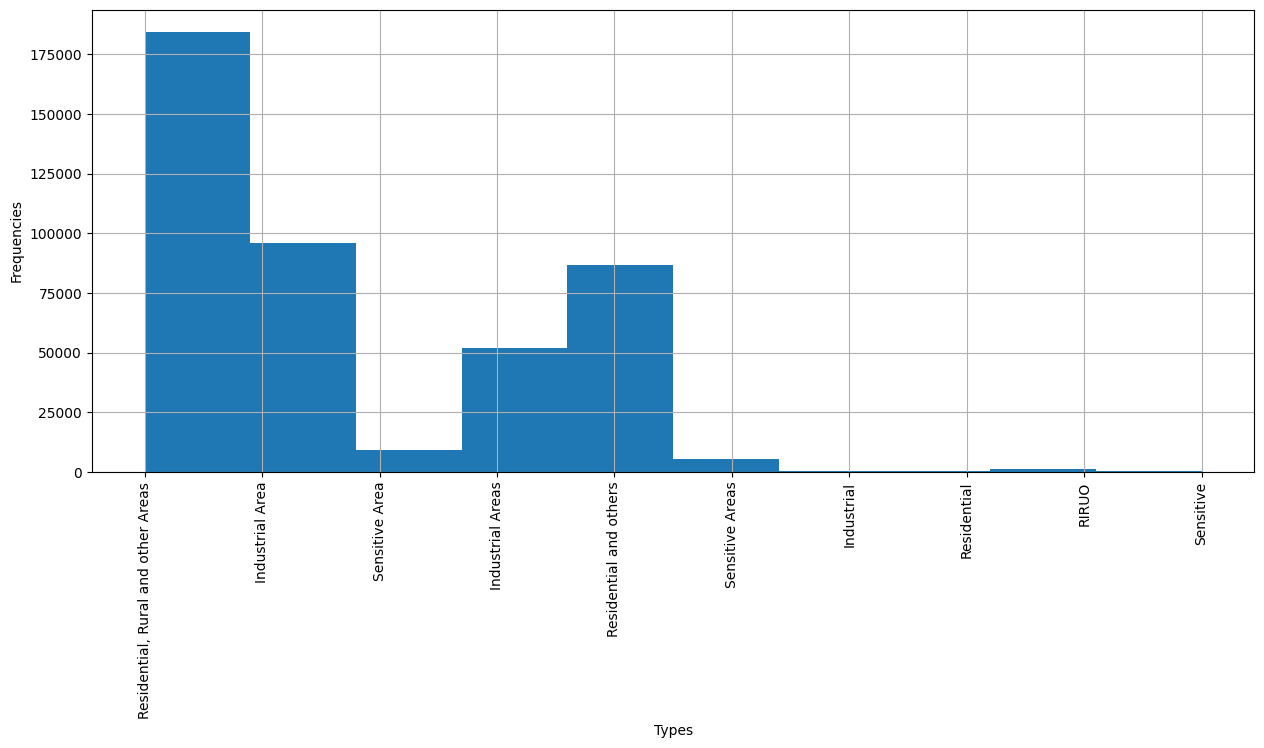

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
india.type.hist() #histogram
plt.xlabel('Types')
plt.ylabel('Frequencies')
plt.plot()

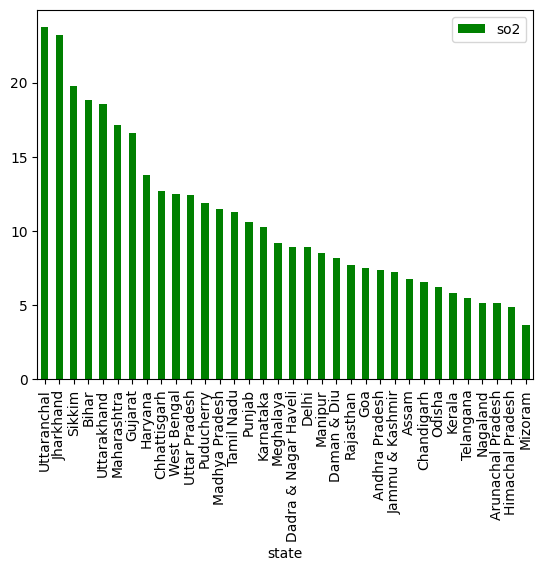

In [22]:
india[['so2','state']].groupby(['state']).mean().sort_values(by='so2',ascending=False).plot.bar(color='green')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

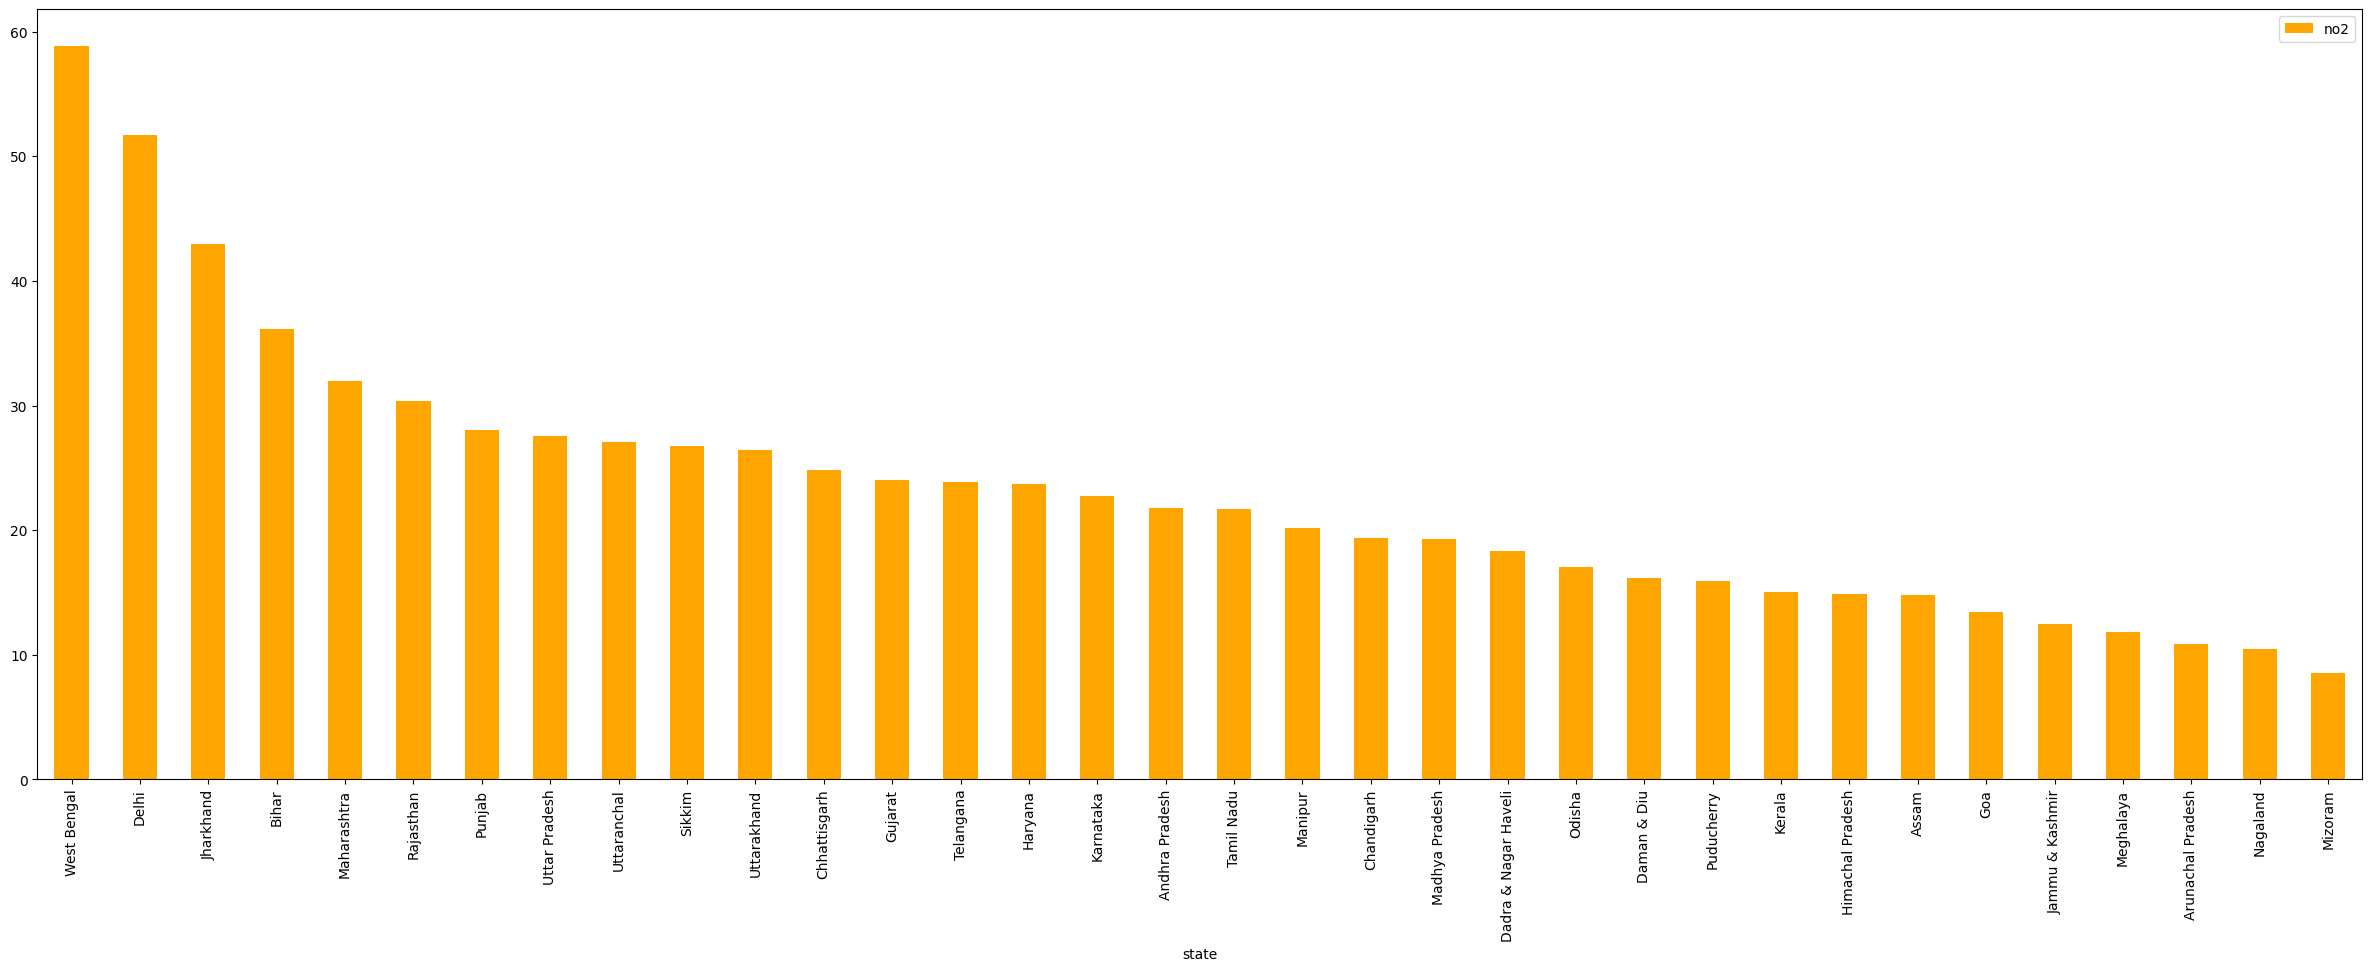

In [23]:
india[['no2','state']].groupby(['state']).mean().sort_values(by='no2',ascending=False).plot.bar(color='orange')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

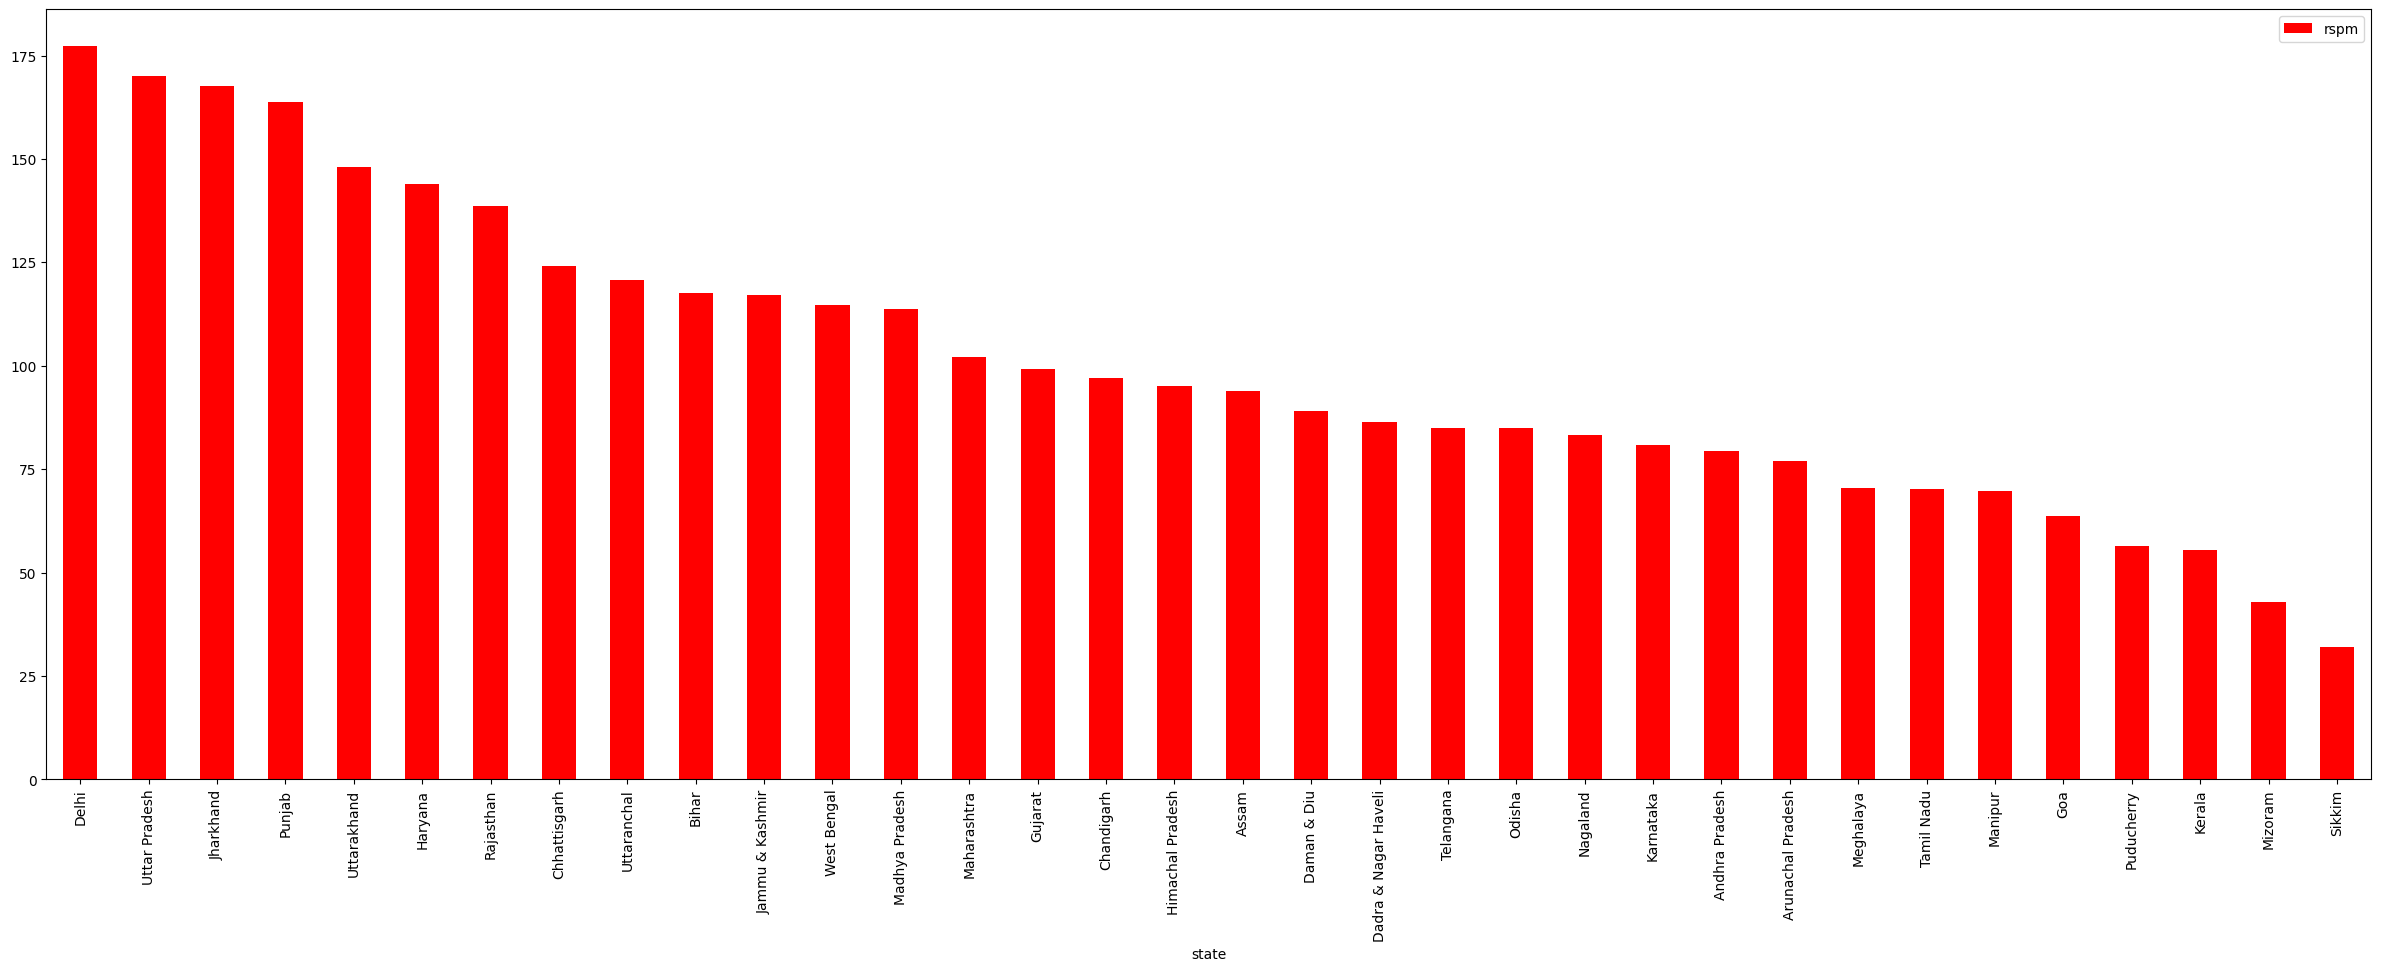

In [24]:
india[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm',ascending=False).plot.bar(color='red')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

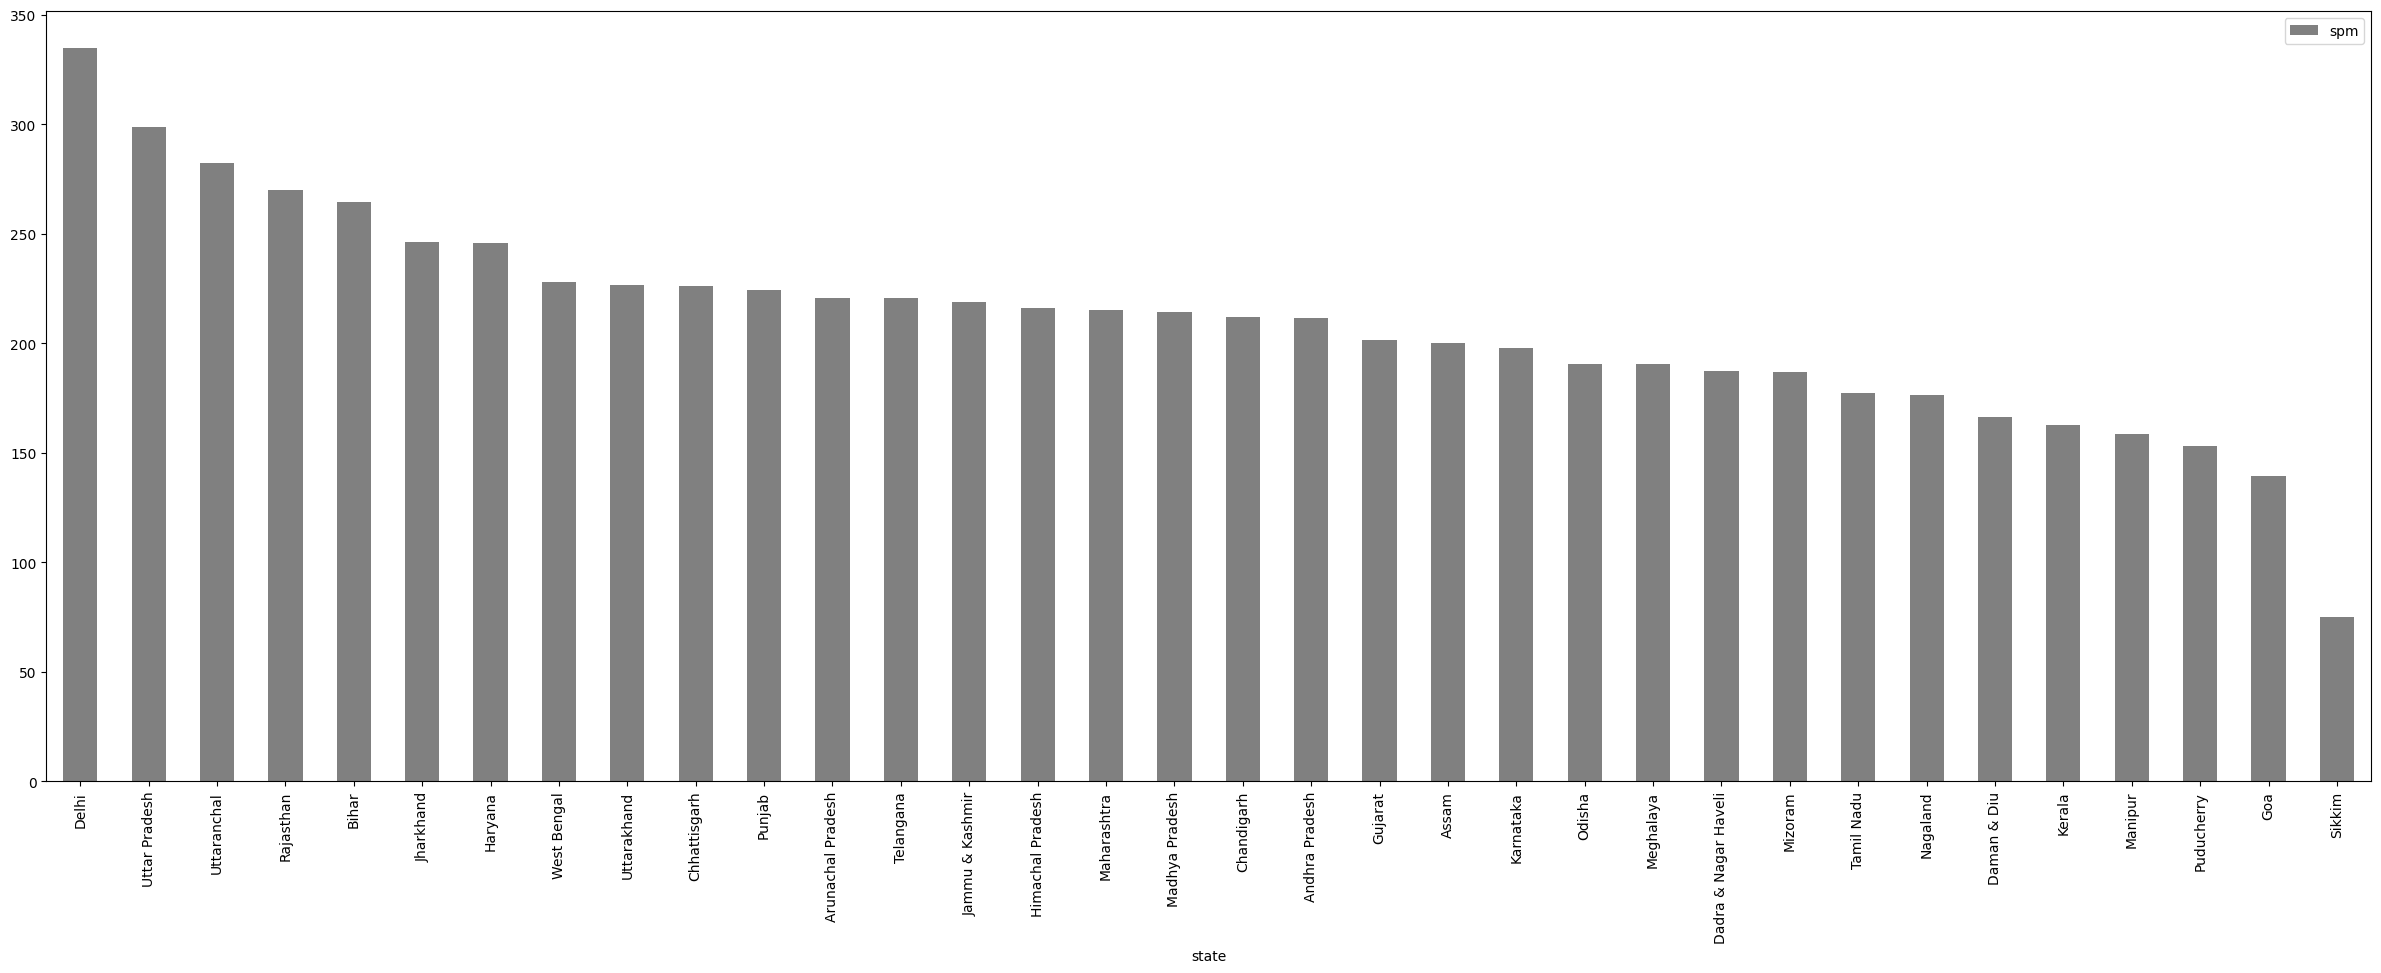

In [25]:
india[['spm','state']].groupby(['state']).mean().sort_values(by='spm',ascending=False).plot.bar(color='grey')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

In [28]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si=so2*(50/40)
    elif (so2>40 and so2<=80):
        si=50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si=100+(so2-80)*(100/300) 
    elif (so2>380 and so2<=800):
        si=200+(so2-380)*(100/420) 
    elif (so2>800 and so2<=1600):
        si=300+(so2-800)*(100/800)
    elif (so2>1600):
        si=400+(so2-1600)*(100/800)
    return si
india['SOi']=india['so2'].apply(cal_SOi)
data=india[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [29]:
def cal_NOi(no2):
    ni=0
    if (no2<=40):
        ni=no2*(50/40)
    elif (no2>40 and no2<=80):
        ni=50+(no2-40)*(50/40)
    elif (no2>80 and no2<=180):
        ni=100+(no2-80)*(100/100) 
    elif (no2>180 and no2<=280):
        ni=200+(no2-180)*(100/100) 
    elif (no2>280 and no2<=400):
        ni=300+(no2-280)*(100/120)
    else:
        ni=400+(no2-400)*(100/120)
    return ni
india['NOi']=india['no2'].apply(cal_NOi)
data=india[['no2','NOi']]
data.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [30]:
def cal_RSPMI(rspm):
    rpi=0
    if (rpi<=30):
        rpi=rpi*(50/30)
    elif (rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*(50/30)
    elif (rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*(100/30) 
    elif (rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*(100/30) 
    elif (rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
india['Rpi']=india['rspm'].apply(cal_RSPMI)
data=india[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,108.832784,0.0
1,108.832784,0.0
2,108.832784,0.0
3,108.832784,0.0
4,108.832784,0.0


In [31]:
def cal_SPMI(spm):
    spi=0
    if (spm<=50):
        spi=spm*(50/50)
    elif (spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif (spm>100 and spm<=250):
        spi=100+(spm-100)*(100/150) 
    elif (spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100) 
    elif (spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
india['SPMi']=india['spm'].apply(cal_SPMI)
data=india[['spm','SPMi']]
data.head()

,spm,SPMi
0,220.78348,180.52232
1,220.78348,180.52232
2,220.78348,180.52232
3,220.78348,180.52232
4,220.78348,180.52232


In [32]:
def cal_aqi(si,ni,rpi,spi):
    aqi=0
    if(si>ni and si>rpi and si>spi):
        aqi=si
    if(ni>si and ni>rpi and ni>spi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    return aqi
india['AQI']=india.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
data=india[['state','SOi','NOi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,NOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,180.52232,180.52232
1,Andhra Pradesh,3.875,8.750,0.0,180.52232,180.52232
2,Andhra Pradesh,7.750,35.625,0.0,180.52232,180.52232
3,Andhra Pradesh,7.875,18.375,0.0,180.52232,180.52232
4,Andhra Pradesh,5.875,9.375,0.0,180.52232,180.52232


In [33]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"
india['AQI_Range']=india['AQI'].apply(AQI_Range) 
india.head()

,state,location,type,so2,no2,rspm,spm,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,6.000,21.750,0.0,180.52232,180.52232,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,3.875,8.750,0.0,180.52232,180.52232,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,7.750,35.625,0.0,180.52232,180.52232,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,7.875,18.375,0.0,180.52232,180.52232,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,5.875,9.375,0.0,180.52232,180.52232,Poor




Total number of values and their percentages:
                  Total  Percent(%)
AQI_Range                         
Poor            327022   75.049973
Unhealthy        31733    7.282571
Moderate         30473    6.993407
Hazardous        18700    4.291560
Very Unhealthy   15823    3.631302
Good             11988    2.751188

AQI_Range Graph:


 Poor Unhealthy Moderate Hazardous Very Unhealthy Good


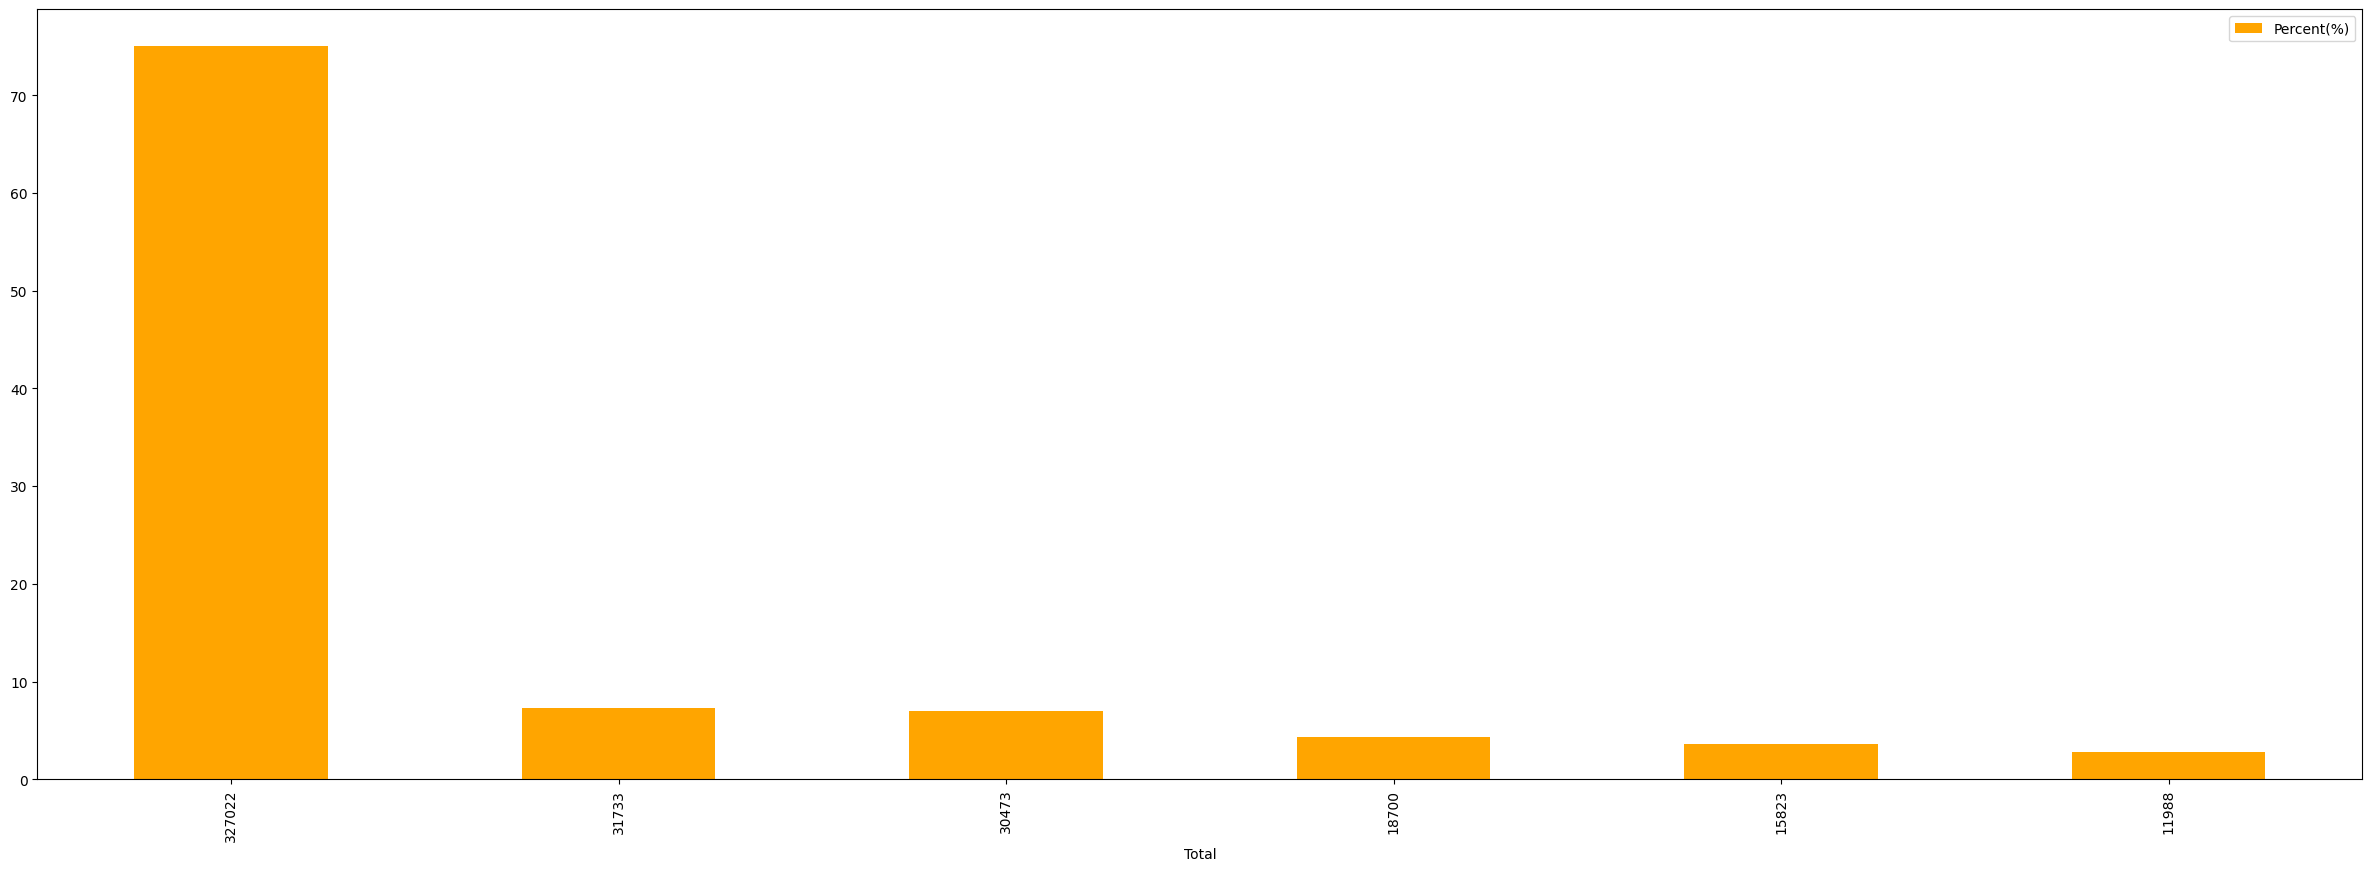


State wise AQI Graph:



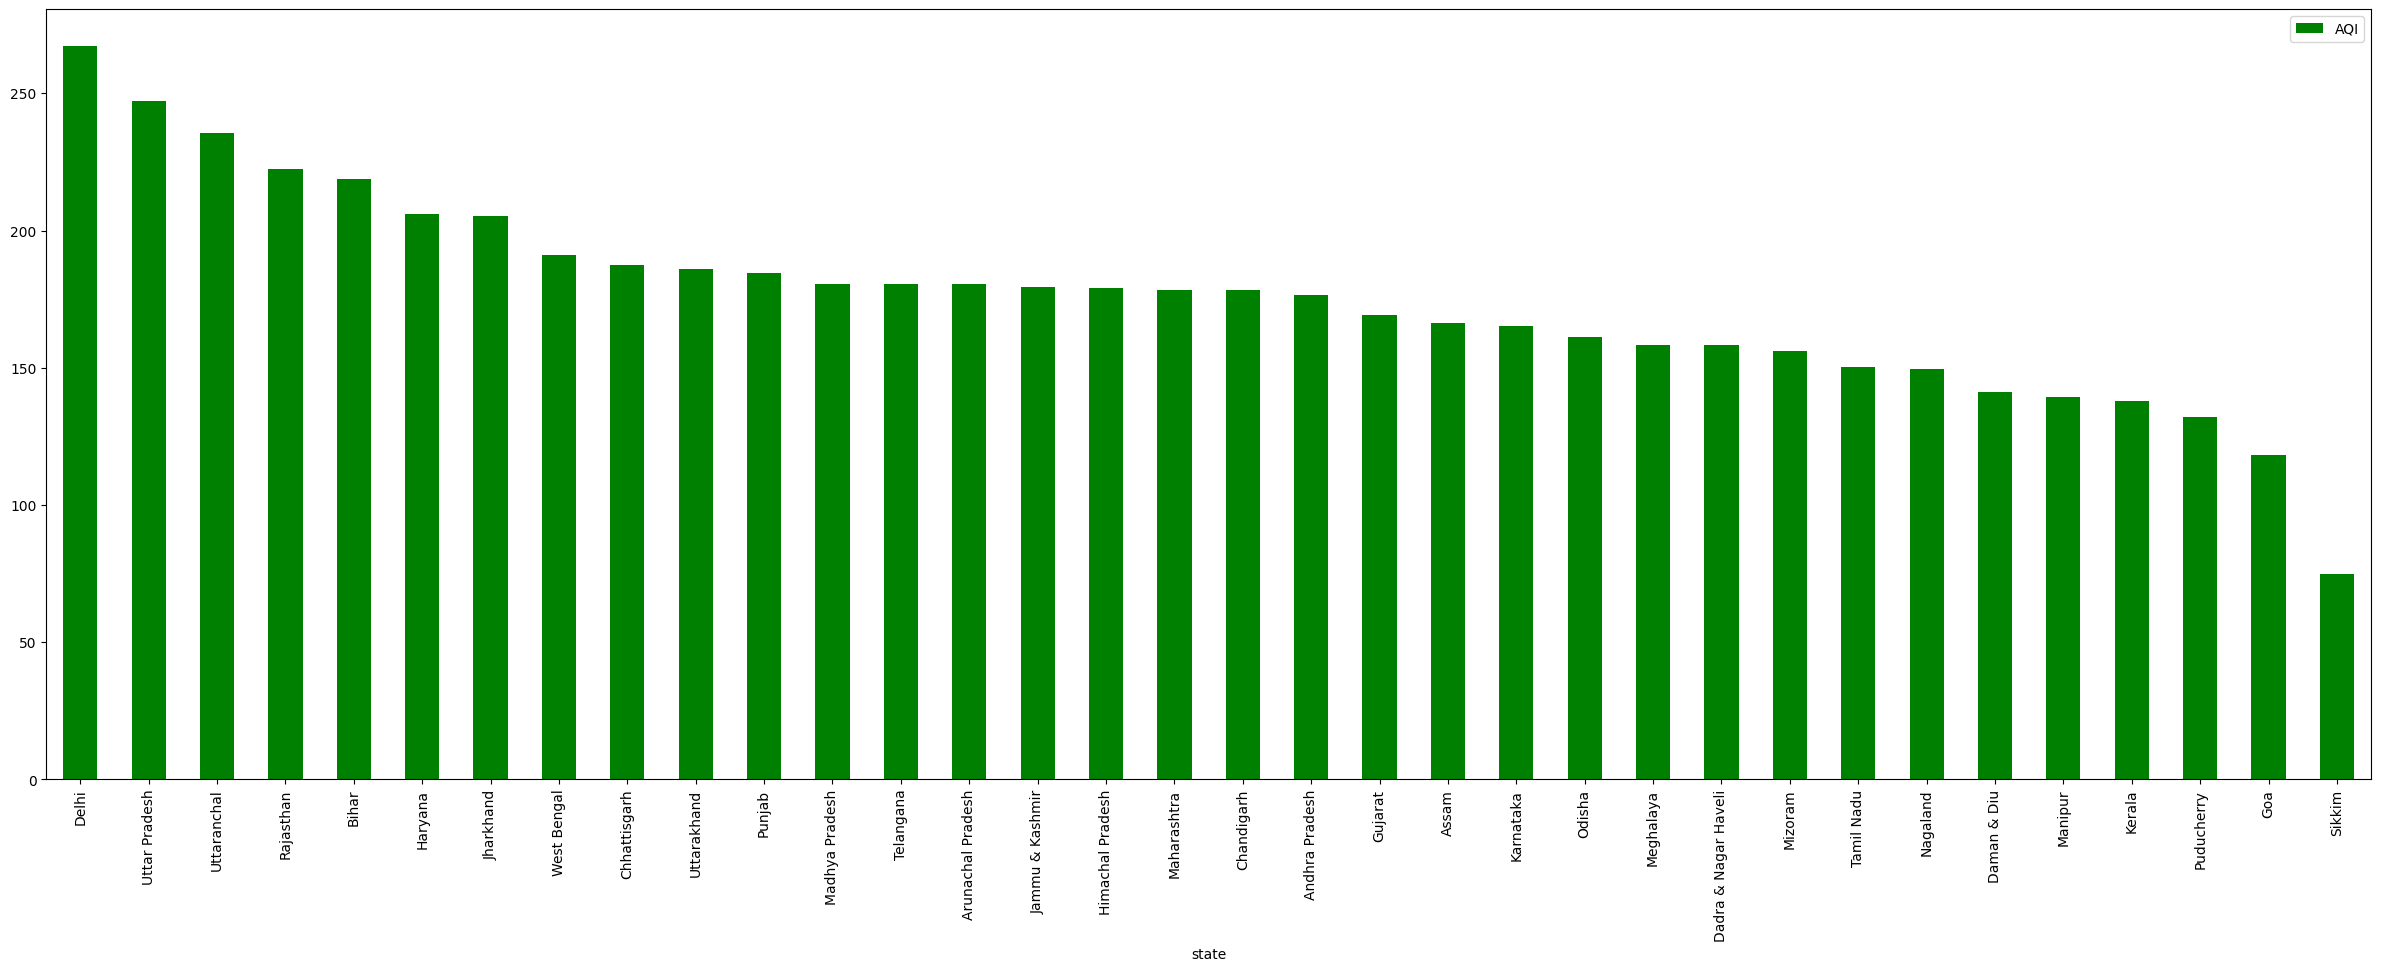


State wise AQI_Range Graph:



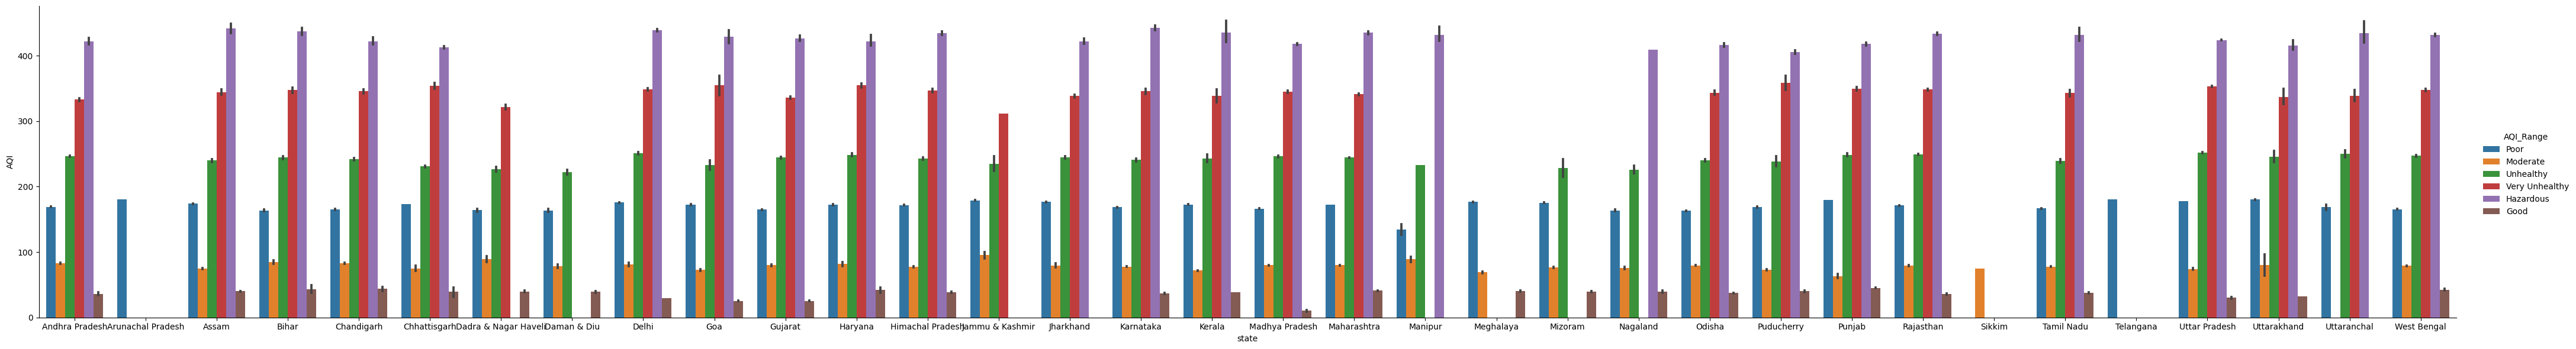

In [36]:
air_quality_class=india['AQI_Range'].value_counts().sort_values(ascending=False)
percentage = (air_quality_class/air_quality_class.sum()*100).sort_values(ascending=False)
data_with_percentage = pd.concat([air_quality_class,percentage], axis=1, keys=['Total','Percent(%)'])
print("\n\nTotal number of values and their percentages:\n",data_with_percentage)
print("\nAQI_Range Graph:\n")
print("\n Poor Unhealthy Moderate Hazardous Very Unhealthy Good")
data_with_percentage.groupby(['Total']).mean().sort_values(by='Percent(%)',ascending=False).plot.bar(color='orange')
plt.rcParams['figure.figsize']=(30,10)
plt.show()
print("\nState wise AQI Graph:\n")
india[['AQI','state']].groupby(['state']).mean().sort_values(by='AQI',ascending=False).plot.bar(color='green')
plt.rcParams['figure.figsize']=(30,10)
plt.show()
print("\nState wise AQI_Range Graph:\n")
import seaborn as sns
sns.catplot(data=india, x="state", y="AQI", hue="AQI_Range", kind="bar",height=6,aspect=7)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
x=india[['so2','no2','rspm','spm']]
y=india['AQI']

In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=70)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [42]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE of Train Data : ",str(RMSE_train))
print("RMSE of Test Data : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",model.score(x_train,y_train))
print("RSquared Value on Test : ",model.score(x_test,y_test))

RMSE of Train Data :  17.475575111731764
RMSE of Test Data :  16.818548260597613
RSquared Value on Train:  0.9479550380989742
RSquared Value on Test :  0.9514775730079252


In [43]:
DT=DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [44]:
train_pred1=DT.predict(x_train)
test_pred1=DT.predict(x_test)

In [45]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred1)))
print("RMSE of Train Data : ",str(RMSE_train))
print("RMSE of Test Data : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",DT.score(x_train,y_train))
print("RSquared Value on Test : ",DT.score(x_test,y_test))

RMSE of Train Data :  3.7425480095048657e-10
RMSE of Test Data :  0.8151240147564469
RSquared Value on Train:  1.0
RSquared Value on Test :  0.9998860241393499


In [46]:
RF=RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
train_pred2=RF.predict(x_train)
test_pred2=RF.predict(x_test)

In [48]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred2)))
print("RMSE of Train Data : ",str(RMSE_train))
print("RMSE of Test Data : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",RF.score(x_train,y_train))
print("RSquared Value on Test : ",RF.score(x_test,y_test))

RMSE of Train Data :  0.406979226161599
RMSE of Test Data :  0.7290115280224633
RSquared Value on Train:  0.9999717732924147
RSquared Value on Test :  0.999908833707044


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
x1=india[['so2','no2','rspm','spm']]
y1=india['AQI_Range']

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.3,random_state=70)

In [52]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

LogisticRegression()

In [53]:
train_pred3=LogReg.predict(x_train)
test_pred3=LogReg.predict(x_test)

In [54]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred3))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred3))
print("="*50)
print("KappaScore :",metrics.cohen_kappa_score(y_test,test_pred3))

Model Accuracy on Train Data: 0.7522597101145182
Model Accuracy on Test Data : 0.7527883600312113
KappaScore : 0.10925354428010448


In [55]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
train_pred4=DTC.predict(x_train)
test_pred4=DTC.predict(x_test)

In [57]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred4))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred4))
print("="*50)
print("KappaScore :",metrics.cohen_kappa_score(y_test,test_pred4))

Model Accuracy on Train Data: 1.0
Model Accuracy on Test Data : 0.999954101069445
KappaScore : 0.9998911676852087


In [58]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
train_pred5=RFC.predict(x_train)
test_pred5=RFC.predict(x_test)

In [60]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred5))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred5))
print("="*50)
print("KappaScore :",metrics.cohen_kappa_score(y_test,test_pred5))

Model Accuracy on Train Data: 1.0
Model Accuracy on Test Data : 0.9999158519606494
KappaScore : 0.9998004738665398


In [61]:
KNN=KNeighborsClassifier().fit(x_train, y_train)

In [62]:
train_pred6=KNN.predict(x_train)
test_pred6=KNN.predict(x_test)

In [63]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred6))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred6))
print("="*50)
print("KappaScore :",metrics.cohen_kappa_score(y_test,test_pred6))

Model Accuracy on Train Data: 0.9977411095119288
Model Accuracy on Test Data : 0.9955784030232095
KappaScore : 0.9895132813670098


In [67]:
s=float(input("Sulphur Dixoide (SO2) : "))
n=float(input("Nitrogen Dixoide (NO2) : "))
r=float(input("Respirable Suspendend Particulate Matter (RSPM): "))
spm=float(input("Suspended Particulate Matter (SPM) : "))
print("="*50)
print("Air Quality Index : ",RF.predict([[s,n,r,spm]]))
print("Air Quality : ",DTC.predict([[s,n,r,spm]]))

Sulphur Dixoide (SO2) :  5.7
Nitrogen Dixoide (NO2) :  21.5
Respirable Suspendend Particulate Matter (RSPM):  46
Suspended Particulate Matter (SPM) :  83


Air Quality Index :  [83.]
Air Quality :  ['Moderate']
